# Airbnb Listing Price Part One
November,2023</br>
Feberary,2024(latest edtion)</br>
In this part I process the dataset from https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews, I also do several feature engineering for the further analysis. Finally I output it as csv, I also upload it to Kaggle with the following website:https://www.kaggle.com/datasets/zhudig123/airbnb-dataset-from-group-7.

<h1>Outline<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-import-the-package" data-toc-modified-id="Introduction:-import-the-package-1">Introduction: import the package</a></span></li><li><span><a href="#Part-one:-Data-Processing" data-toc-modified-id="Part-one:-Data-Processing-2">Part one: Data Processing</a></span><ul class="toc-item"><li><span><a href="#One.-Basic-information-of-the-dataset" data-toc-modified-id="One.-Basic-information-of-the-dataset-2.1">One. Basic information of the dataset</a></span></li><li><span><a href="#Two.-Data-Cleaning" data-toc-modified-id="Two.-Data-Cleaning-2.2">Two. Data Cleaning</a></span></li><li><span><a href="#Three.Further-data-cleaning-regarding-host-related-variables" data-toc-modified-id="Three.Further-data-cleaning-regarding-host-related-variables-2.3">Three.Further data cleaning regarding host-related variables</a></span></li><li><span><a href="#Four.Further-data-cleaning-for-listing-related-variables" data-toc-modified-id="Four.Further-data-cleaning-for-listing-related-variables-2.4">Four.Further data cleaning for listing-related variables</a></span></li><li><span><a href="#Five.Further-data-cleaning-for-review-related-variables." data-toc-modified-id="Five.Further-data-cleaning-for-review-related-variables.-2.5">Five.Further data cleaning for review-related variables.</a></span></li><li><span><a href="#Six.Outlier-handling." data-toc-modified-id="Six.Outlier-handling.-2.6">Six.Outlier handling.</a></span></li><li><span><a href="#Seven.visualization." data-toc-modified-id="Seven.visualization.-2.7">Seven.visualization.</a></span></li></ul></li><li><span><a href="#Part-two：Feature-Engineering" data-toc-modified-id="Part-two：Feature-Engineering-3">Part two：Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#One.Basic-feature-engineering." data-toc-modified-id="One.Basic-feature-engineering.-3.1">One.Basic feature engineering.</a></span></li><li><span><a href="#Two.Special-handling-for-the-&quot;amenities&quot;-variable" data-toc-modified-id="Two.Special-handling-for-the-&quot;amenities&quot;-variable-3.2">Two.Special handling for the "amenities" variable</a></span></li><li><span><a href="#Three.Dimensionality-reduction-of-the-data." data-toc-modified-id="Three.Dimensionality-reduction-of-the-data.-3.3">Three.Dimensionality reduction of the data.</a></span></li><li><span><a href="#Four.Calculate-the-distance-from-the-city-center-using-&quot;longitude&quot;-and-&quot;latitude&quot;" data-toc-modified-id="Four.Calculate-the-distance-from-the-city-center-using-&quot;longitude&quot;-and-&quot;latitude&quot;-3.4">Four.Calculate the distance from the city center using "longitude" and "latitude"</a></span></li><li><span><a href="#Five.Standardize-the-data" data-toc-modified-id="Five.Standardize-the-data-3.5">Five.Standardize the data</a></span></li></ul></li></ul></div>

## Introduction: import the package
Use kaggle to import the dataset automatically.

In [1]:
import numpy as np
import pandas as pd
import datetime

from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import textwrap

#import toad

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,LassoCV,RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

import warnings
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.sans-serif']=['SimHei']   # Use SimHei to show the Chinese
matplotlib.rcParams['axes.unicode_minus']=False

import zipfile
import os


In [21]:
# Set Chinese for MAC
plt.rcParams['font.family'] = ['Heiti TC']

In [13]:
# Install kaggle if you haven't
!pip install kaggle

In [16]:
!kaggle datasets download -d mysarahmadbhat/airbnb-listings-reviews


  0%|          | 0.00/101M [00:00<?, ?B/s]
  1%|          | 1.00M/101M [00:00<00:57, 1.82MB/s]
  2%|▏         | 2.00M/101M [00:00<00:29, 3.46MB/s]
  3%|▎         | 3.00M/101M [00:00<00:20, 4.94MB/s]
  6%|▌         | 6.00M/101M [00:00<00:09, 10.5MB/s]
  9%|▉         | 9.00M/101M [00:01<00:06, 15.4MB/s]
 12%|█▏        | 12.0M/101M [00:01<00:05, 18.2MB/s]
 15%|█▍        | 15.0M/101M [00:02<00:13, 6.74MB/s]
 17%|█▋        | 17.0M/101M [00:02<00:11, 7.68MB/s]
 19%|█▉        | 19.0M/101M [00:02<00:11, 7.62MB/s]
 21%|██        | 21.0M/101M [00:02<00:09, 8.46MB/s]
 23%|██▎       | 23.0M/101M [00:03<00:10, 7.68MB/s]
 24%|██▍       | 24.0M/101M [00:03<00:11, 7.28MB/s]
 25%|██▍       | 25.0M/101M [00:03<00:11, 7.02MB/s]
 26%|██▌       | 26.0M/101M [00:03<00:11, 6.77MB/s]
 27%|██▋       | 27.0M/101M [00:03<00:11, 6.62MB/s]
 29%|██▉       | 29.0M/101M [00:03<00:09, 8.21MB/s]
 30%|██▉       | 30.0M/101M [00:04<00:12, 5.73MB/s]
 31%|███       | 31.0M/101M [00:04<00:12, 5.85MB/s]
 33%|███▎      | 33.

## Part one: Data Processing
In this part we'll process the data for further analysis.
### One. Basic information of the dataset

In [43]:
# compressed file path
zip_path='airbnb-listings-reviews.zip'

# read the compressed file
file=zipfile.ZipFile(zip_path)
# decompress files
print('Starting to unzip...')
file.extractall()
print('Unzipping completed.')
# close the file handle
file.close()

Starting to unzip...
Unzipping completed.


In [44]:
data = pd.read_csv('.\\Airbnb Data\\Listings.csv',
                   encoding='ISO-8859-1',
                   dtype={'host_response_time':object,'district':object})
data.sample(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
174389,46690273,The Sages' Room,6871685,2013-06-12,ZA,within an hour,1.0,1.00,t,9.0,...,2,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
244440,39029646,Temporada em Copacabana,295532174,2019-09-16,BR,within a few hours,1.0,1.00,f,2.0,...,2,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
204452,12054768,Atlantic luxury holiday villa,18479858,2014-07-20,"Johannesburg, Gauteng, South Africa",within an hour,1.0,0.88,t,2.0,...,3,110,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f
30442,9049668,Big apartment close to the beach,16149633,2014-05-29,Brasil,within an hour,1.0,NaN,f,1.0,...,3,1125,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f
5741,25107164,Great studio flat in one of the best area of P...,18004277,2014-07-12,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,5,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [45]:
data.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

From the information above, we could see that there're many null value in the dataset. A data cleaning is essential before my modelling.

### Two. Data Cleaning

In [47]:
# Detecting Duplicate Values
if data[data.duplicated()].empty:
    print("No duplicate value.")
else:
    print('Duplicate value as foloows,')
    data_duplicate = data[data.duplicated()]
    display(df_duplicate)
    data.drop_duplicates(inplace = True)
    data.index = range(len(data))
    print('Already handled {} duplicate data.'.format(len(data_duplicate)))

No duplicate value.


In [48]:
# Detecting and Handling Missing Values
data_missing = pd.DataFrame(data.isna().sum(),columns=['Amount'])
display(data_missing)

,Amount
listing_id,0
name,175
host_id,0
host_since,165
host_location,840
host_response_time,128782
host_response_rate,128782
host_acceptance_rate,113087
host_is_superhost,165
host_total_listings_count,165


We will categorize different variables.</br>
"Name" is difficult to analyze as it contains text data. We will simply fill the missing values with "Unnamed."</br>
Variables such as "Host_since," "host_is_superhost," "host_total_listings_count," "host_has_profile_pic," and "host_identity_verified" have the same number of missing values. This suggests that they likely come from the same samples, possibly due to users having deregistered from the platform when building the dataset. Therefore, we will delete samples that have missing values in all these variables (165 samples, accounting for only 0.006% of the total dataset).</br>
If an apartment is from the same city, its host is likely to be from the same city as well. We will fill in "host_location" based on this principle.</br>
The "District" variable has too many missing values, and "city" and "neighborhood" already provide similar location information. Therefore, we will directly delete this column.

In [49]:
#fill or remove missing values in specific columns
data['name'].fillna('Unnamed',inplace=True)

data.dropna(axis=0,how='all',
            subset=['host_since',
                    'host_is_superhost',
                    'host_total_listings_count',
                    'host_has_profile_pic',
                    'host_identity_verified'],
            inplace=True)

data['host_location'] = data.groupby('city')['host_location'].fillna(method='ffill').fillna(method='bfill')

data = data.drop(columns=['district'])

### Three.Further data cleaning regarding host-related variables
We will conduct further cleaning for the variables from "host_id" to "host_identity_verified."</br>
For the time-related data, we will convert it to the number of days since registration to facilitate its application in regression analysis.

In [50]:
#compute the number of days since registration
latest_time = pd.to_datetime('2021/08/15') #The dataset's latest edit was on August 15, 2021. We will consider this as the last day.
delta_time = latest_time-pd.to_datetime(data['host_since'])
delta_time = delta_time.astype('str').apply(lambda x:x[:-5]).astype('int32')
data.insert(loc=4,column='host_duration',value=delta_time)

For binary text variables, we will convert them into dummy variables to facilitate subsequent analysis.

In [51]:
#To convert categorical variables like 'host_is_superhost' into dummy variables
data['host_is_superhost'] = pd.get_dummies(data['host_is_superhost'],
                                           drop_first=True)
data['host_has_profile_pic'] = pd.get_dummies(data['host_has_profile_pic'],
                                           drop_first=True)
data['host_identity_verified'] = pd.get_dummies(data['host_identity_verified'],
                                           drop_first=True)

Before the cleaning process, we conducted an analysis of the relationships between variables and the distribution of numerical values within each variable. This was done to determine the methods we would use in subsequent steps.

In [52]:
#filter out rows with missing values and rows without missing values for variable analysis
data_known1 = data.dropna(axis=0,
                          how='any',
                          subset=['host_response_time',
                                  'host_response_rate',
                                  'host_acceptance_rate'])
data_miss1 = data.drop(axis=0,
                       index=data_known1.index)

In [53]:
#encode the categorical variable "host_response_time" using label encoding
encoder = LabelEncoder()
data_known1_labeled = data_known1.copy()
data_known1_labeled['host_response_time'] = encoder.fit_transform(data_known1['host_response_time'])

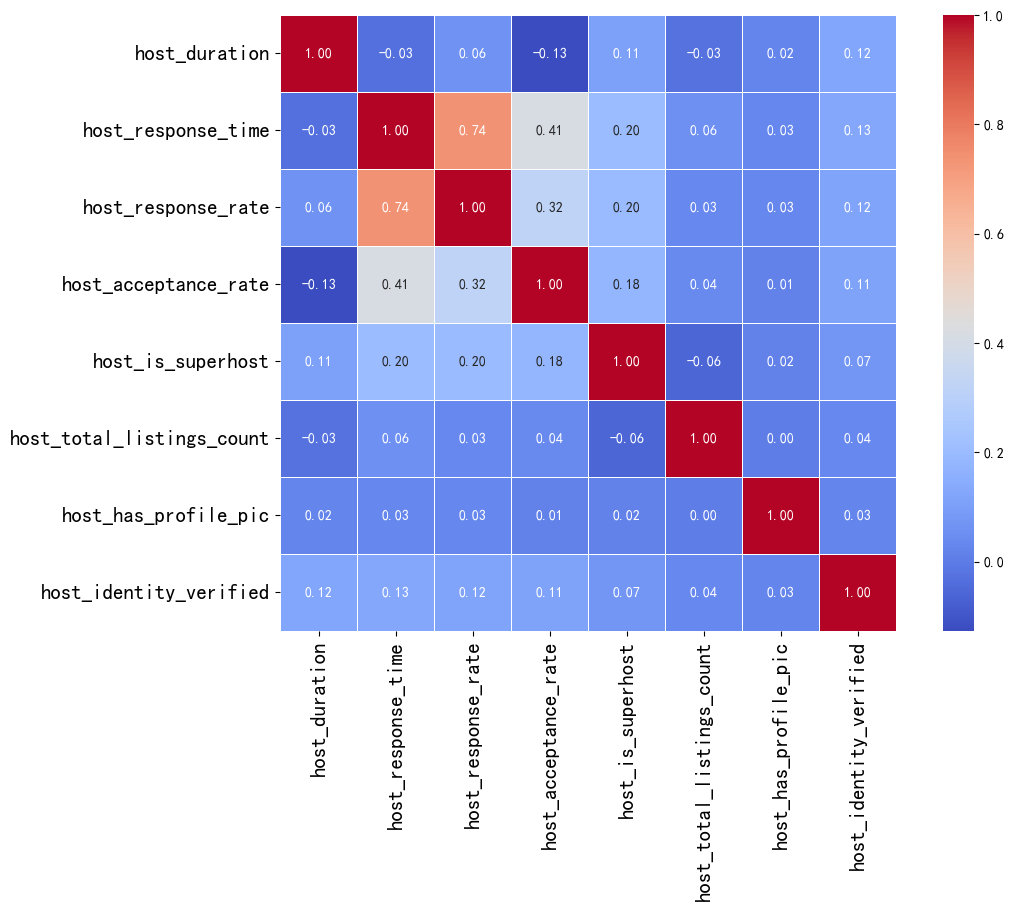

In [54]:
#create a heatmap of correlation coefficients
host_label = ['host_duration','host_response_time','host_response_rate',
              'host_acceptance_rate','host_is_superhost','host_total_listings_count',
              'host_has_profile_pic','host_identity_verified']
host_corr = data_known1_labeled[host_label].corr()
plt.figure(figsize=(12,8))
sns.heatmap(host_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, square=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [55]:
data_known1.groupby(['host_response_time']).count()

,listing_id,name,host_id,host_since,host_duration,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
host_response_time,,,,,,,,,,,,,,,,,,,,,
a few days or more,9856,9856,9856,9856,9856,9856,9856,9856,9856,9856,...,9856,9856,6092,6091,6091,6090,6091,6091,6091,9856
within a day,19212,19212,19212,19212,19212,19212,19212,19212,19212,19212,...,19212,19212,13887,13882,13883,13878,13880,13877,13875,19212
within a few hours,26115,26115,26115,26115,26115,26115,26115,26115,26115,26115,...,26115,26115,19713,19692,19693,19690,19691,19687,19687,26115
within an hour,79829,79829,79829,79829,79829,79829,79829,79829,79829,79829,...,79829,79829,63743,63603,63606,63598,63603,63600,63599,79829


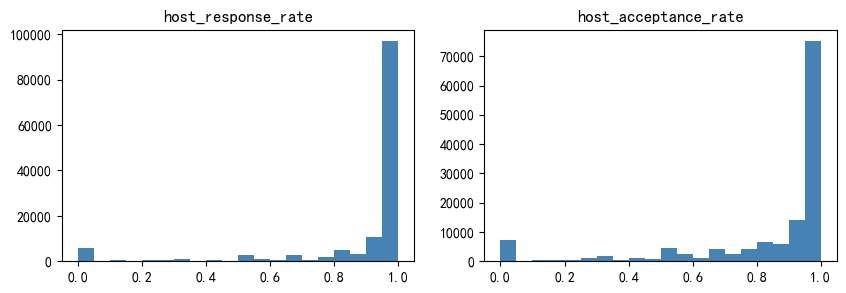

In [56]:
#Create a histogram to show the distribution of 'host_response_rate' and 'host_acceptance_rate'.
host_for_hist = ['host_response_rate','host_acceptance_rate']

fig,ax = plt.subplots(1,2,figsize=(10,3))

for i in range(2):
    ax[i].hist(x=data_known1[host_for_hist[i]],
               bins=20,
               color='steelblue')
    ax[i].set_title(host_for_hist[i])
plt.show()

According to the above analysis, it can be observed that the variables "host_response_time," "host_response_rate," and "host_acceptance_rate" have relatively weak correlations with other host-related data. Additionally, these variables exhibit a clear left-skewed distribution. Therefore, we adopt the mode filling method to preserve their distribution shapes.

In [57]:
data['host_response_time'].fillna('within an hour',inplace=True)
data['host_response_rate'].fillna(data_known1['host_response_rate'].mode()[0],inplace=True)
data['host_acceptance_rate'].fillna(data_known1['host_acceptance_rate'].mode()[0],inplace=True)

### Four.Further data cleaning for listing-related variables
We will further clean the variables from "neighbourhood" to "price (dollar)."

In [58]:
#Output the total number of city categories.
city = data['city'].unique()
print(city)

['Paris' 'New York' 'Bangkok' 'Rio de Janeiro' 'Sydney' 'Istanbul' 'Rome'
 'Hong Kong' 'Mexico City' 'Cape Town']


Due to the use of local currencies in the dataset for "price," we will convert all prices to US dollars for ease of subsequent analysis.</br>
Note: We are using exchange rate data from August 15, 2021, which is the latest edit date of the original dataset. We assume this date as the time of data retrieval.

In [59]:
#Exchange rate data is sourced from the Winds financial terminal
rate = [1.179100,1.000000,0.030003,0.190600,0.736900,
        0.117314,1.179100,0.128488,0.050355,0.067932]

exchange_rate = pd.DataFrame({'city':city,
                              'exchange_to_dollar':rate})
display(exchange_rate)

,city,exchange_to_dollar
0,Paris,1.179100
1,New York,1.000000
2,Bangkok,0.030003
3,Rio de Janeiro,0.190600
4,Sydney,0.736900
5,Istanbul,0.117314
6,Rome,1.179100
7,Hong Kong,0.128488
8,Mexico City,0.050355
9,Cape Town,0.067932


In [60]:
#Convert local currencies to US dollars.
data = pd.merge(data,exchange_rate,how='outer',on='city')
data['price(dollar)'] = data['price']*data['exchange_to_dollar']
data = data.drop(columns=['price','exchange_to_dollar'])

Before the cleaning process, we conducted an analysis of the relationships between variables and the distribution of numerical values for each variable. This helped us determine the methods we will employ in the subsequent steps.

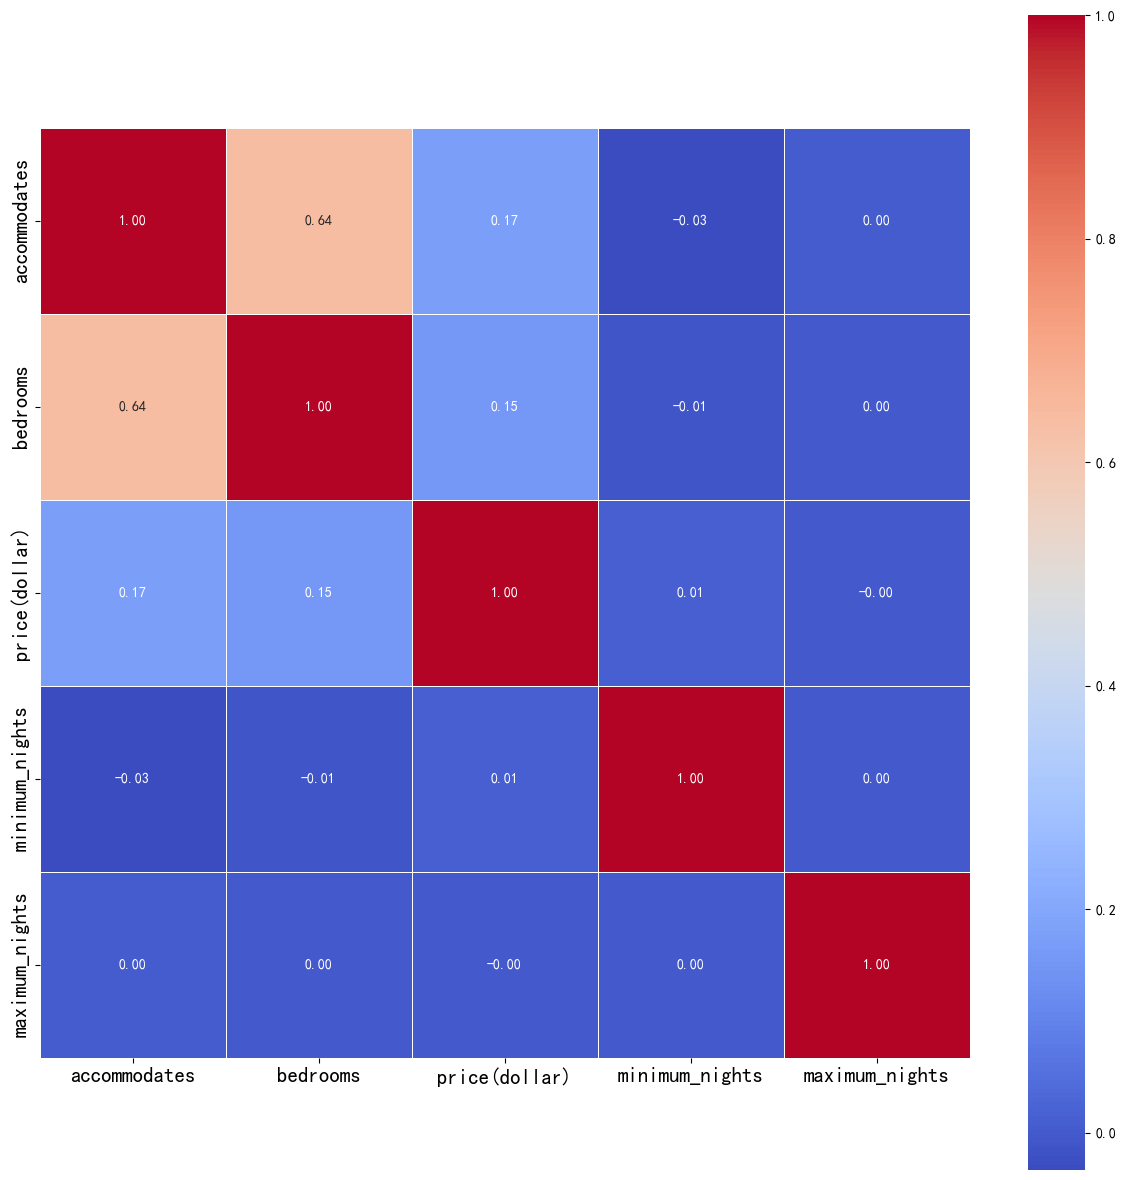

In [61]:
#Create a correlation heatmap for the variables 'accommodates,' 'bedrooms,' 'price (dollar),' 'minimum_nights,' and 'maximum_nights.'
listing_label = ['accommodates','bedrooms','price(dollar)','minimum_nights','maximum_nights']
listing_corr = data[listing_label].corr()
plt.figure(figsize=(15,15))
sns.heatmap(listing_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, square=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

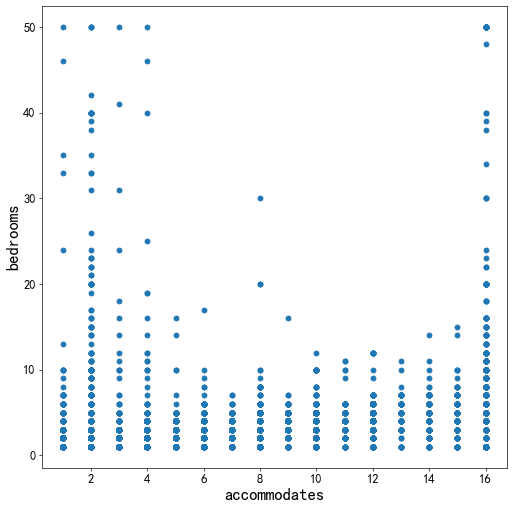

In [62]:
#visualize the relationship between the 'accommodates' column and the 'bedrooms' column.
x = data['accommodates']
y = data['bedrooms']

plt.figure(figsize=(10,10),dpi=60)
plt.scatter(x,y)
plt.xlabel('accommodates',fontsize=20)
plt.ylabel('bedrooms',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

According to the above analysis, there is a strong correlation between "bedrooms" and "accommodates." Therefore, we will fill missing values in the subset of data grouped by "accommodates" with the median of "bedrooms" within each group.

In [63]:
#fill the NaN values in the 'bedrooms' column of the dataframe with the median value from the 'accommodates' column.
bedrooms_median = data.groupby('accommodates')['bedrooms'].median()
bedrooms_median[0] = 1
for i in range(len(data)):
    if np.isnan(data.loc[i,'bedrooms']):
        index = data.loc[i,'accommodates']
        data.loc[i,'bedrooms'] = bedrooms_median[index]
    else:
        pass

### Five.Further data cleaning for review-related variables.
We will further clean the variables from "review_scores_rating" to "review_scores_value."

In [64]:
review_label = ['review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value']

In [65]:
#extract columns containing missing values and columns without missing values.
data_known2 = data.dropna(axis=0,
                          how='any',
                          subset=review_label)
data_miss2 = data.drop(axis=0,
                       index=data_known2.index)

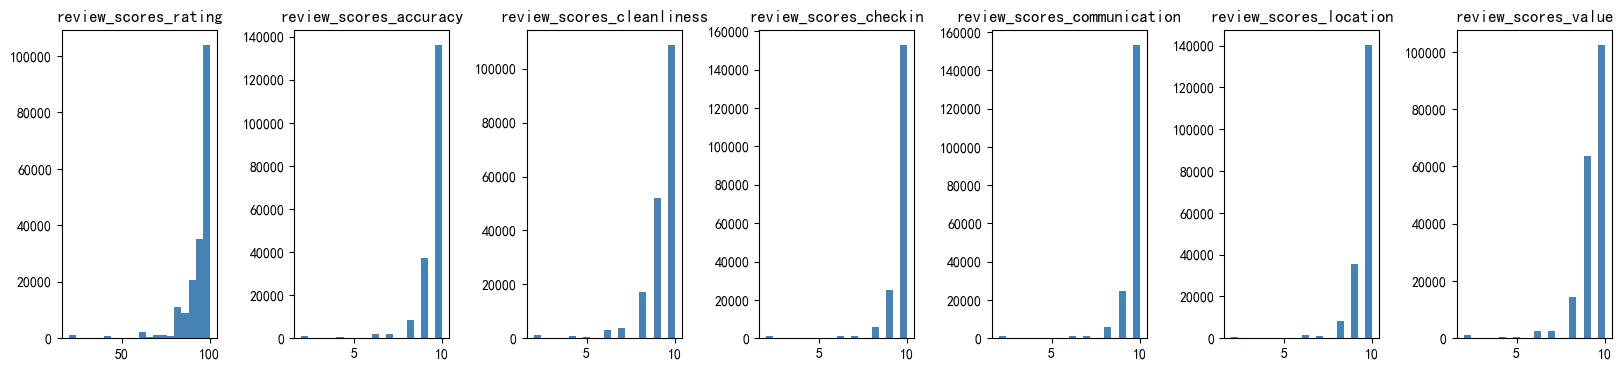

In [66]:
#Create a distribution histogram.
fig,ax = plt.subplots(1,7,figsize=(20,4))
fig.subplots_adjust(wspace=0.5)
for i in range(7):
        ax[i].hist(x=data_known2[review_label[i]],
                   bins=20,
                   color='steelblue')
        ax[i].set_title(review_label[i])
plt.show()

In [67]:
#fill missing values with the median.
for col in review_label:
    data[col].fillna(data[col].median(),inplace=True)

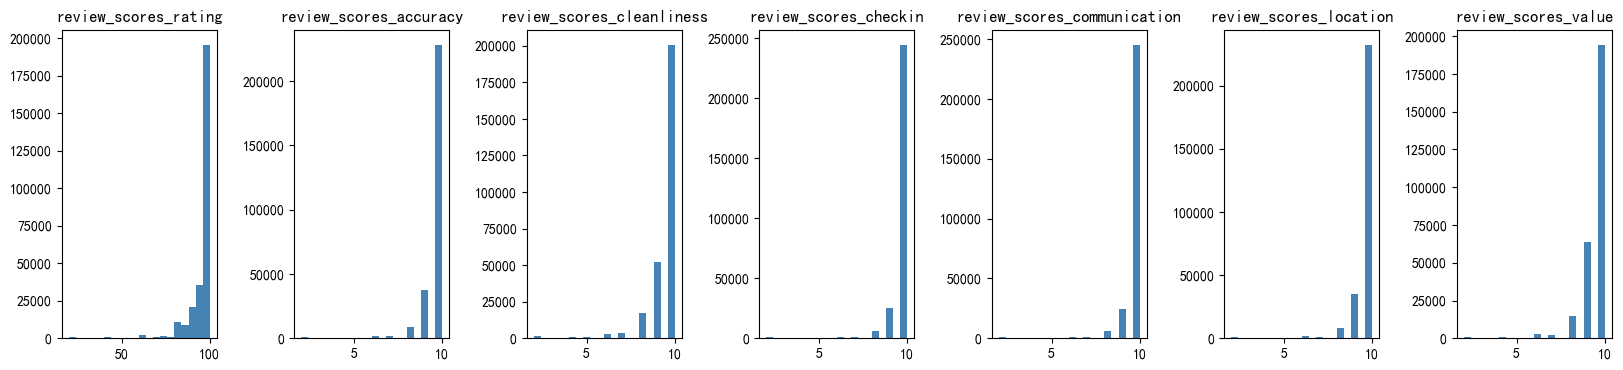

In [68]:
fig,ax = plt.subplots(1,7,figsize=(20,4))
fig.subplots_adjust(wspace=0.5)
for i in range(7):
        ax[i].hist(x=data[review_label[i]],
                   bins=20,
                   color='steelblue')
        ax[i].set_title(review_label[i])
plt.show()

It can be observed that after filling, we still maintain the original distribution shapes of these variables.

### Six.Outlier handling.

In [69]:
data[['minimum_nights','maximum_nights']].describe()

,minimum_nights,maximum_nights
count,279547.000000,2.795470e+05
mean,8.051998,2.757443e+04
std,31.527493,7.285024e+06
min,1.000000,1.000000e+00
25%,1.000000,4.500000e+01
50%,2.000000,1.125000e+03
75%,5.000000,1.125000e+03
max,9999.000000,2.147484e+09


As observed in the table, the maximum values in the data seem unusually large, which we believe might be due to operational errors during platform entry or web scraping. We will apply a statistical method to trim the top 1% of the data, considering it as a form of tail truncation.

In [70]:
#replace the outliers in the ['minimum_nights', 'maximum_nights'] columns with the truncated values.
outlier_col = ['minimum_nights','maximum_nights']
for col in outlier_col:
    data[col] = winsorize(data[col],limits=[0,0.01])

In [71]:
data[['minimum_nights','maximum_nights']].describe()

,minimum_nights,maximum_nights
count,279547.000000,279547.000000
mean,7.006986,691.047945
std,12.268774,512.936242
min,1.000000,1.000000
25%,1.000000,45.000000
50%,2.000000,1125.000000
75%,5.000000,1125.000000
max,82.000000,1125.000000


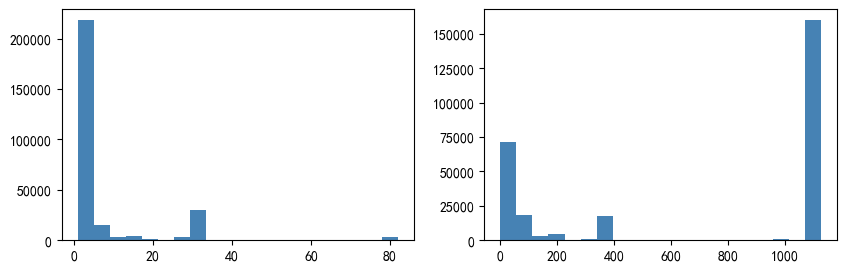

In [72]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].hist(x=data['minimum_nights'],bins=20,color='steelblue')
ax[1].hist(x=data['maximum_nights'],bins=20,color='steelblue')
plt.show()

### Seven.visualization.

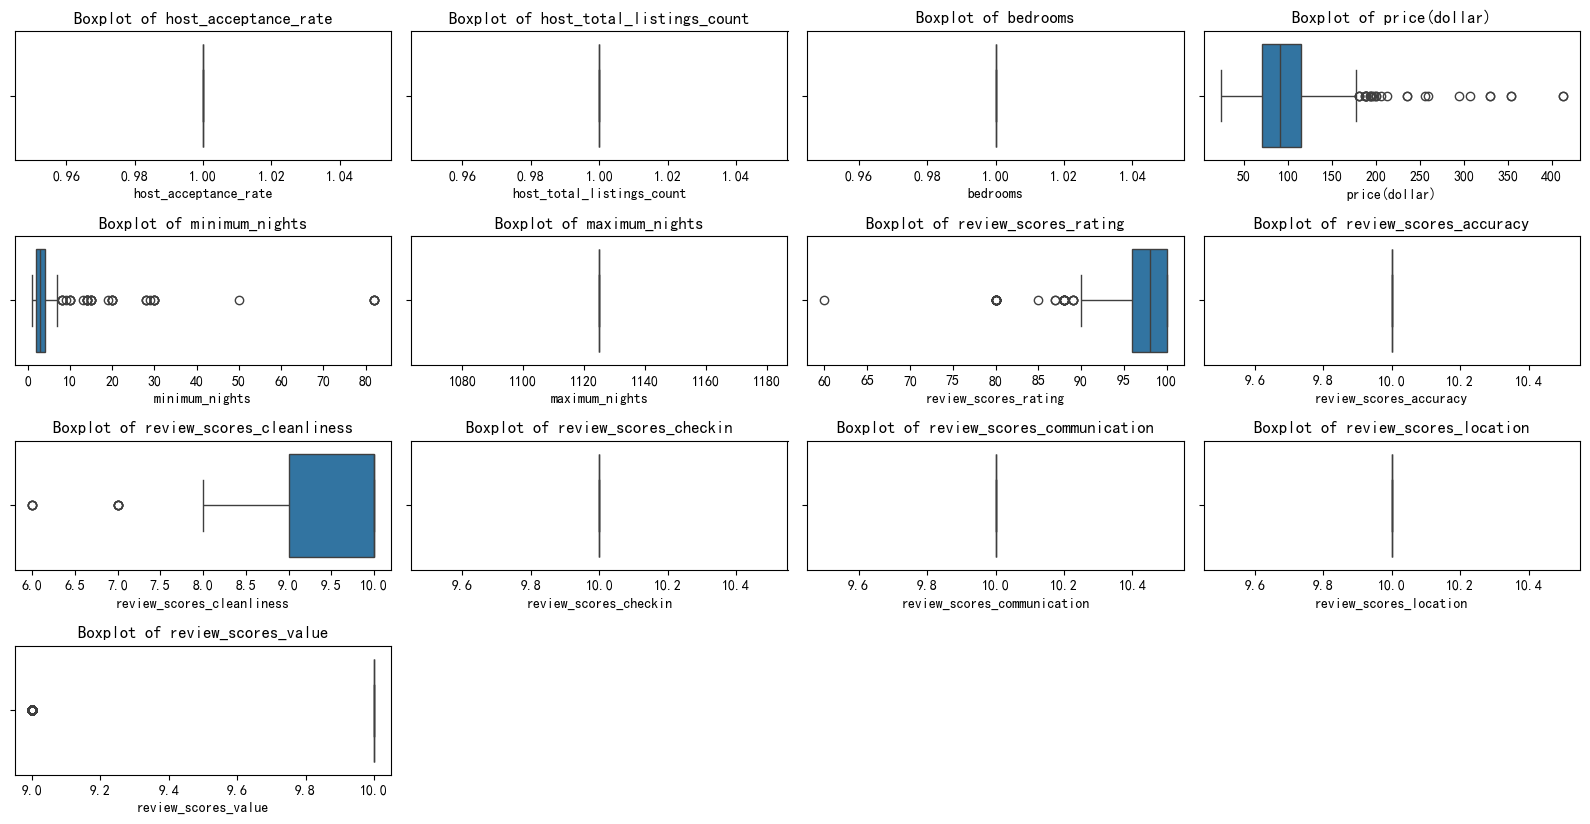

In [73]:
# draw boxplot
columns_to_plot = ['host_acceptance_rate', 'host_total_listings_count', 'bedrooms', 'price(dollar)',
                    'minimum_nights', 'maximum_nights', 'review_scores_rating',
                    'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value']

# define the size of figure
plt.figure(figsize=(16, 10))

# draw boxplots of each variables in a loop
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)  # 创建子图，5 行 4 列
    sns.boxplot(x=data[column].head(1000))
    plt.title(f'Boxplot of {column}')

# adjust the arrangement of subplots
plt.tight_layout()
plt.show()

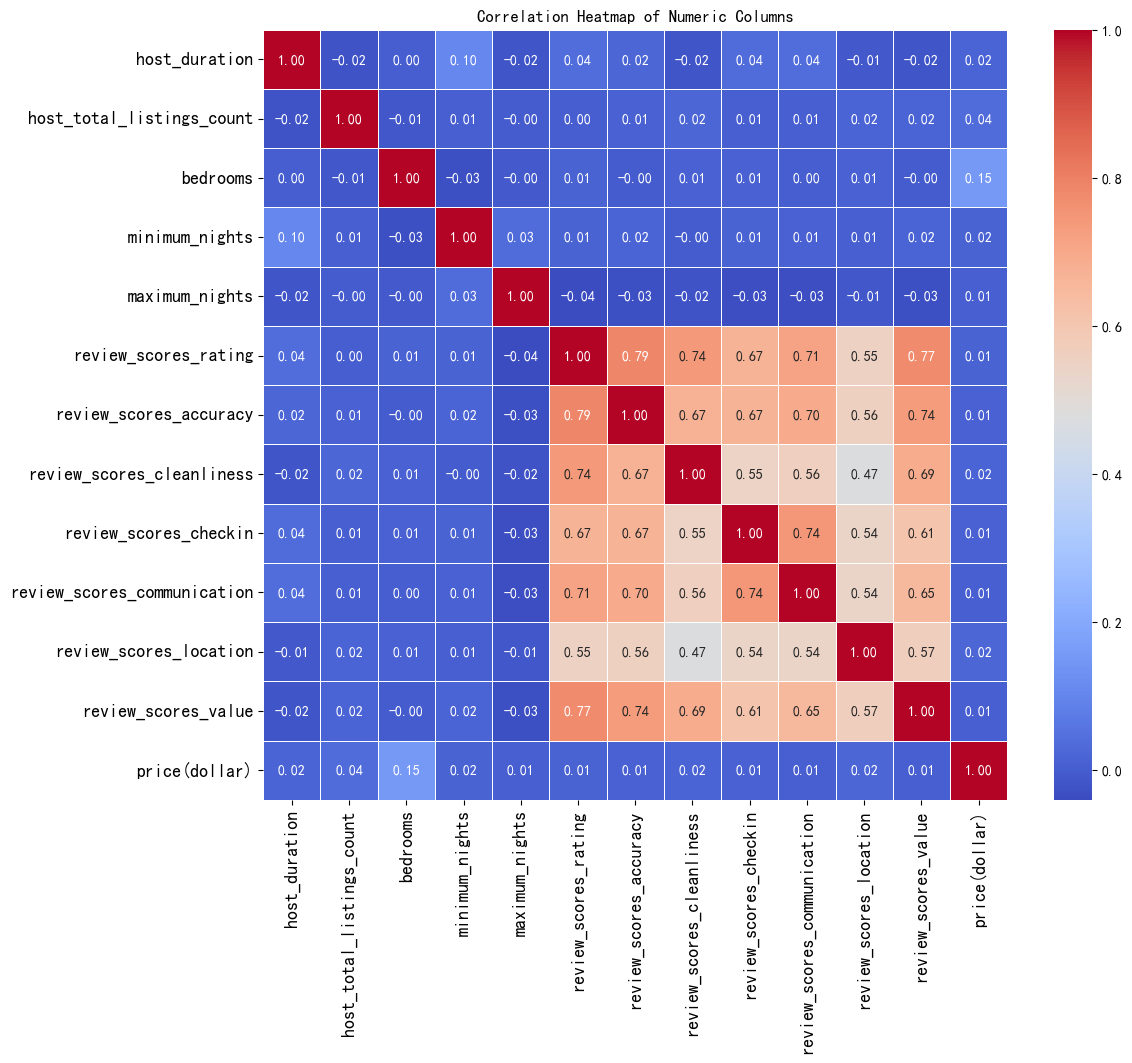

In [74]:
# draw heartmap
# select the numerical variables
numeric_columns = [ 'host_duration','host_total_listings_count', 'bedrooms',
                    'minimum_nights', 'maximum_nights', 'review_scores_rating',
                    'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value','price(dollar)']

# creat a subset including numerical variables
numeric_subset = data[numeric_columns]

# calculate the correlation between cariables
correlation_matrix = numeric_subset.corr()

# draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

From the above chart, it can be seen that the current features have limited correlation with the target variable. Therefore, we will use feature engineering to create new variables to improve the fitting during the subsequent model training.

## Part two：Feature Engineering
In this part, we will build new features on top of the original dataset.
### One.Basic feature engineering.
First, we will attempt to convert text features into numerical features that can be used later.

In [75]:
#extracting text features
text_col = ['listing_id','host_id','host_location','host_response_time',
            'neighbourhood','city','property_type','room_type',
            'amenities','instant_bookable']

for col in text_col:
    num = len(data[col].unique())
    print("The number of unique value in {} is:{}".format(col,num))

The number of unique value in listing_id is:279547
The number of unique value in host_id is:181901
The number of unique value in host_location is:7159
The number of unique value in host_response_time is:4
The number of unique value in neighbourhood is:660
The number of unique value in city is:10
The number of unique value in property_type is:143
The number of unique value in room_type is:4
The number of unique value in amenities is:244872
The number of unique value in instant_bookable is:2


Based on the above results, "listing_id" is unique for each sample, so we will use it as the index for our dataset.</br>
For variables like "host_id," "host_location," "neighbourhood," and "property_type," they are categorical variables with a large number of unique values. Moreover, the information they contain can be covered by other variables. Therefore, we choose to remove these variables.</br>
For variables like "host_response_time," "city," "room_type," and "instant_bookable," as categorical variables, they are well-suited for conversion into dummy variables. Thus, we convert them into dummy variables.</br>
Regarding the "amenities" variable, it is unique, and further processing will be done on it later.

In [76]:
#delete certain columns
data_processed = data.copy()

data_processed.set_index('listing_id',drop=True,inplace=True)

col_drop = ['name','host_id','host_since','host_location',
            'neighbourhood','property_type']
data_processed = data_processed.drop(columns=col_drop)

In [77]:
#convert the original variables into dummy variables
col_dummy = ['host_response_time','city','room_type']

for col in col_dummy:
    dummy = pd.get_dummies(data_processed[col])
    data_processed = data_processed.join(dummy,on='listing_id')
    data_processed = data_processed.drop(columns=col)
    
data_processed['instant_bookable'] = pd.get_dummies(data_processed['instant_bookable'],drop_first=True)

### Two.Special handling for the "amenities" variable

In [78]:
pd.DataFrame(data_processed['amenities'].sample(5))

,amenities
listing_id,
39232640,"[""Shampoo"", ""Air conditioning"", ""Lock on bedro..."
6927369,"[""Shampoo"", ""Heating"", ""TV"", ""Iron"", ""Kitchen""..."
43767114,"[""Garden or backyard"", ""TV"", ""Dryer"", ""Free pa..."
22272584,"[""Hot water"", ""Elevator"", ""Lock on bedroom doo..."
40502806,"[""Air conditioning"", ""Refrigerator"", ""Iron"", ""..."


It can be observed that although "amenities" is a string-type data, its format resembles that of a list. Therefore, we will convert it into a list for further analysis.

In [79]:
#Convert the string-formatted lists in the 'amenities' column into Python lists.
amenity = data_processed['amenities']
amenity = amenity.apply(eval)
len(amenity)

279547

When an apartment offers more amenities, its price is expected to be higher. Therefore, we will use the number of amenities each apartment has as a new feature.

In [80]:
#calculate the length of each element (list) in the 'amenities' column
amenity_num = pd.DataFrame(amenity.apply(len))
amenity_num.rename(columns={'amenities':'amenity_num'},inplace=True)
data_processed = data_processed.join(amenity_num,on='listing_id')

Next, we attempt to analyze the frequency of each item mentioned in the 'amenities' column.

In [81]:
#flatten the nested lists and output the top 5 most frequent elements
def flatten(series):
    return pd.Series([x for _list in series for x in _list])

amenity_count = flatten(amenity).value_counts()
print(amenity_count[:5])

Wifi                       259952
Essentials                 253393
Long term stays allowed    240905
Kitchen                    240774
TV                         212929
Name: count, dtype: int64


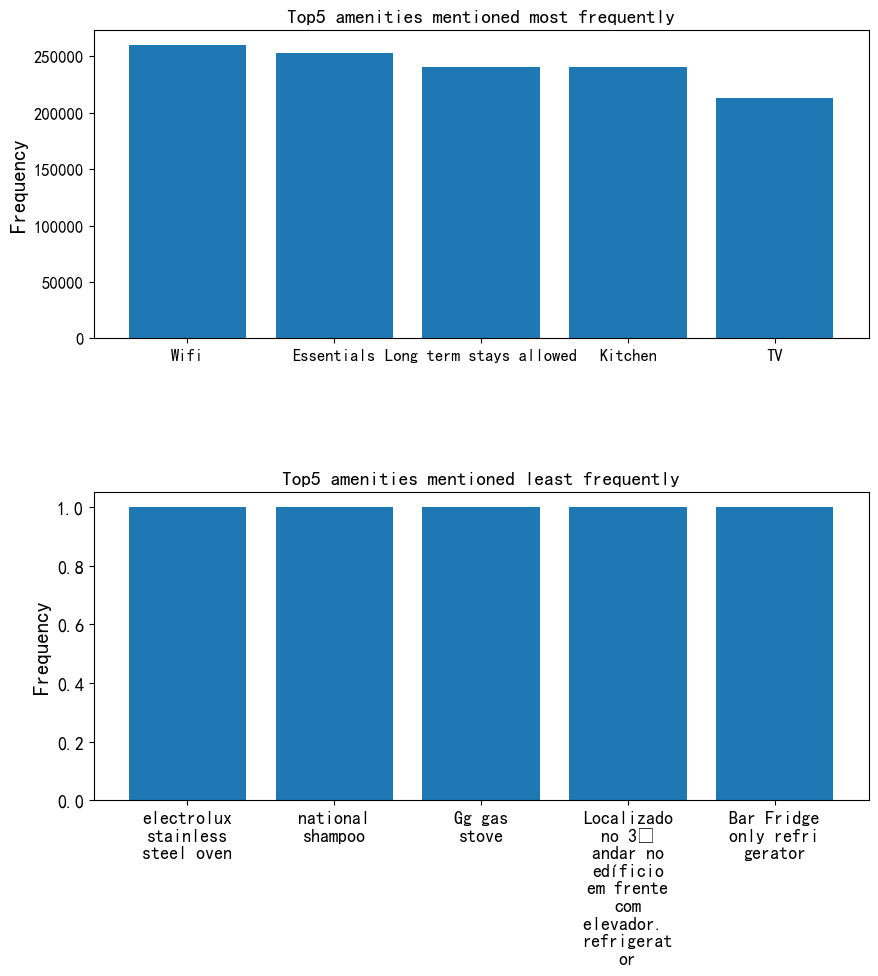

In [82]:
#display the top 5 and bottom 5 amenities based on their frequencies in the 'amenities' column
fig,ax = plt.subplots(2,1,figsize = (10,10))

ax[0].bar(amenity_count[:5].index,amenity_count[:5].values)
ax[0].tick_params(labelsize=12)
ax[0].set_ylabel("Frequency", size = 15)
ax[0].set_title("Top5 amenities mentioned most frequently", size = 14)

ax[1].bar(amenity_count[-5:].index,amenity_count[-5:].values)
ax[1].set_xticklabels([textwrap.fill(label, 10) for label in amenity_count[-5:].index])
ax[1].tick_params(labelsize=13)
ax[1].set_ylabel("Frequency", size = 15)
ax[1].set_title("Top5 amenities mentioned least frequently", size = 14)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [83]:
amenity_count.values

array([259952, 253393, 240905, ...,      1,      1,      1], dtype=int64)

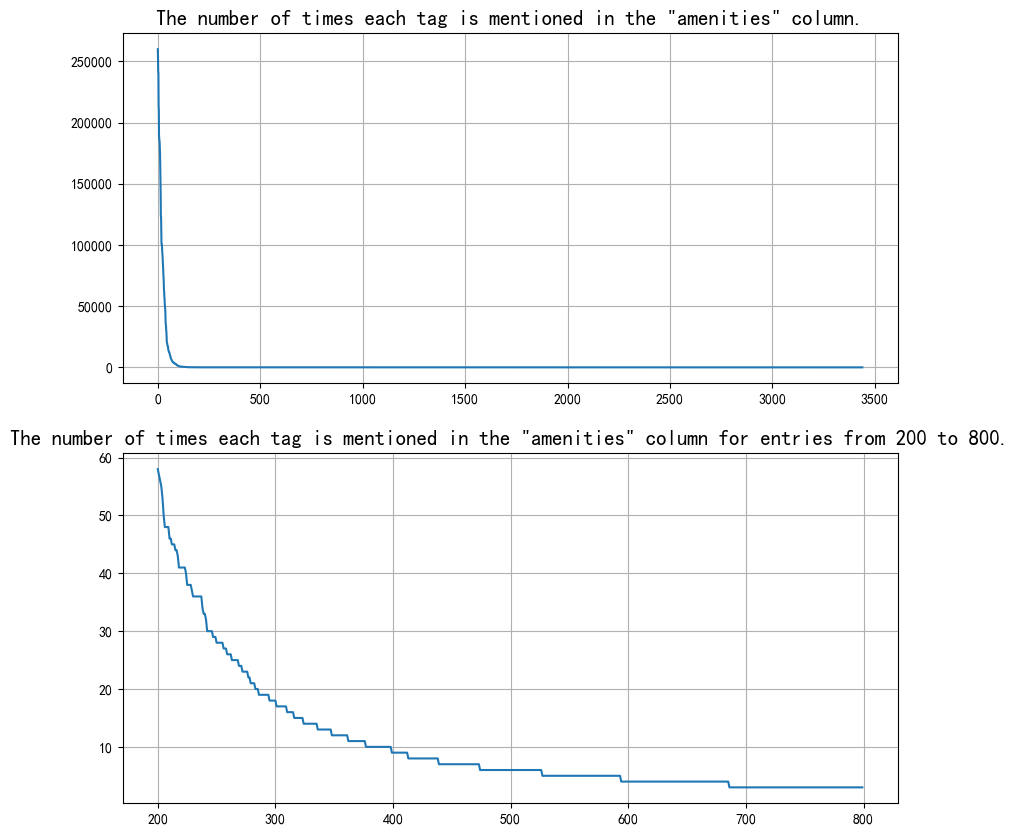

In [85]:
#visualize the count of each tag mentioned in the 'amenities' column
fig,ax = plt.subplots(2,1,figsize = (10,10))
ax[0].plot(amenity_count.values)
ax[0].set_title('The number of times each tag is mentioned in the "amenities" column.',fontsize=15)
ax[0].grid()

x = [i for i in range(200,800)]
ax[1].plot(x,amenity_count.values[200:800])
ax[1].set_title('The number of times each tag is mentioned in the "amenities" column for entries from 200 to 800.',fontsize=15)
ax[1].grid()
plt.show()

It is evident that many amenities are mentioned only a few times. Therefore, we will perform preliminary variable selection based on the frequency of each amenity being mentioned.

In [44]:
amenity_top = amenity_count[amenity_count>=30] #30 is determined based on the elbow method in the above visualization results

Next, we will convert them all into boolean data for ease of subsequent dimensionality reduction.

In [45]:
def boolean(df, unique_items):
    # Create empty dict
    bool_dict = {}

    # Loop through all the tags
    for i, item in enumerate(unique_items):
        # Apply boolean mask
        bool_dict[item] = df.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [46]:
%%time
#convert the items in the 'amenities' column to boolean values
amenity_bool = boolean(amenity,amenity_top.keys())
amenity_int = amenity_bool.astype(int)

CPU times: user 20.7 s, sys: 211 ms, total: 20.9 s
Wall time: 20.7 s


In [47]:
print("The shape of matrix id:",amenity_int.shape)

The shape of matrix id: (279547, 247)


### Three.Dimensionality reduction of the data.

Due to the high dimensionality of features, we have decided to use the PCA method for dimensionality reduction to retain the main and effective information. First, we will analyze the eigenvalues to determine the specific value of n_components in PCA.

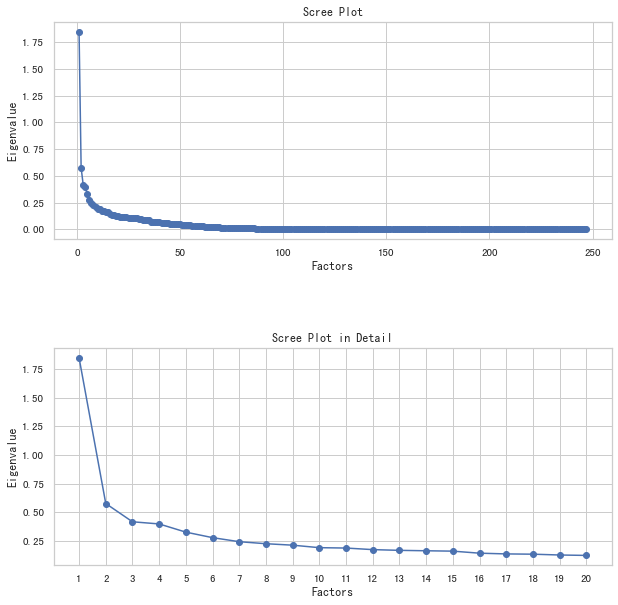

In [157]:
#perform Principal Component Analysis (PCA) and plot the "Scree Plot" of the eigenvalues
feature_mean = np.mean(amenity_int,axis=0)
sample_num,feature_num = np.shape(amenity_int)
mean_matrix = np.tile(feature_mean,(sample_num,1))
amenity_int_adjust = amenity_int-mean_matrix
cov_matrix = np.cov(amenity_int_adjust.T)

featValue, featVec=  np.linalg.eig(cov_matrix)
featValue = sorted(featValue)[::-1]

fig,ax = plt.subplots(2,1,figsize=(10,10))

ax[0].scatter(range(1, amenity_int.shape[1] + 1), featValue)
ax[0].plot(range(1, amenity_int.shape[1] + 1), featValue)
ax[0].set_title("Scree Plot")  
ax[0].set_xlabel("Factors")
ax[0].set_ylabel("Eigenvalue")
ax[0].grid(True)

ax[1].scatter(range(1,21), featValue[:20])
ax[1].plot(range(1,21), featValue[:20])

x_major_locator=MultipleLocator(1)
ax[1].xaxis.set_major_locator(x_major_locator)

ax[1].set_title("Scree Plot in Detail")  
ax[1].set_xlabel("Factors")
ax[1].set_ylabel("Eigenvalue")
ax[1].grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

Based on the elbow method, we have determined the value of n_components to be 6.

In [49]:
#reduce the original dataset `amenity_int` through PCA to a new dataset "amenity_int_6D" with 6 dimensions
pca = PCA(n_components=6)
amenity_int_6D = pca.fit_transform(amenity_int)
amenity_int_6D.shape

(279547, 6)

In [50]:
#merge the new feature data into the original dataset and delete the columns that are no longer needed in the original dataset
amenity_feature_name = ['amenity1','amenity2',
                        'amenity3','amenity4',
                        'amenity5','amenity6']

amenity_feature = pd.DataFrame(data=amenity_int_6D,
                               index=amenity_int.index,
                              columns=amenity_feature_name)

data_processed = data_processed.join(amenity_feature,on='listing_id')
data_processed = data_processed.drop(columns='amenities')

### Four.Calculate the distance from the city center using "longitude" and "latitude"
Since the dataset already contains the "city" dummy variable, and the information in "longitude" and "latitude" overlaps with it, we have decided to use them to construct new features for replacement.

In [86]:
location = data_processed[['latitude','longitude',
                      'Paris','New York','Bangkok','Rio de Janeiro','Sydney','Istanbul',
                      'Rome','Hong Kong','Mexico City','Cape Town']]
city = city.tolist()
location.head()

,latitude,longitude,Paris,New York,Bangkok,Rio de Janeiro,Sydney,Istanbul,Rome,Hong Kong,Mexico City,Cape Town
listing_id,,,,,,,,,,,,
281420,48.88668,2.33343,True,False,False,False,False,False,False,False,False,False
3705183,48.88617,2.34515,True,False,False,False,False,False,False,False,False,False
4082273,48.88112,2.31712,True,False,False,False,False,False,False,False,False,False
4797344,48.84571,2.30584,True,False,False,False,False,False,False,False,False,False
4823489,48.85500,2.26979,True,False,False,False,False,False,False,False,False,False


In [87]:
#dynamically create multiple DataFrames, where each DataFrame represents the longitude and latitude data for a different city
for i in range(len(city)):
    exec("city{} = location[location['{}']==1][['latitude','longitude']]".format(i,city[i]))

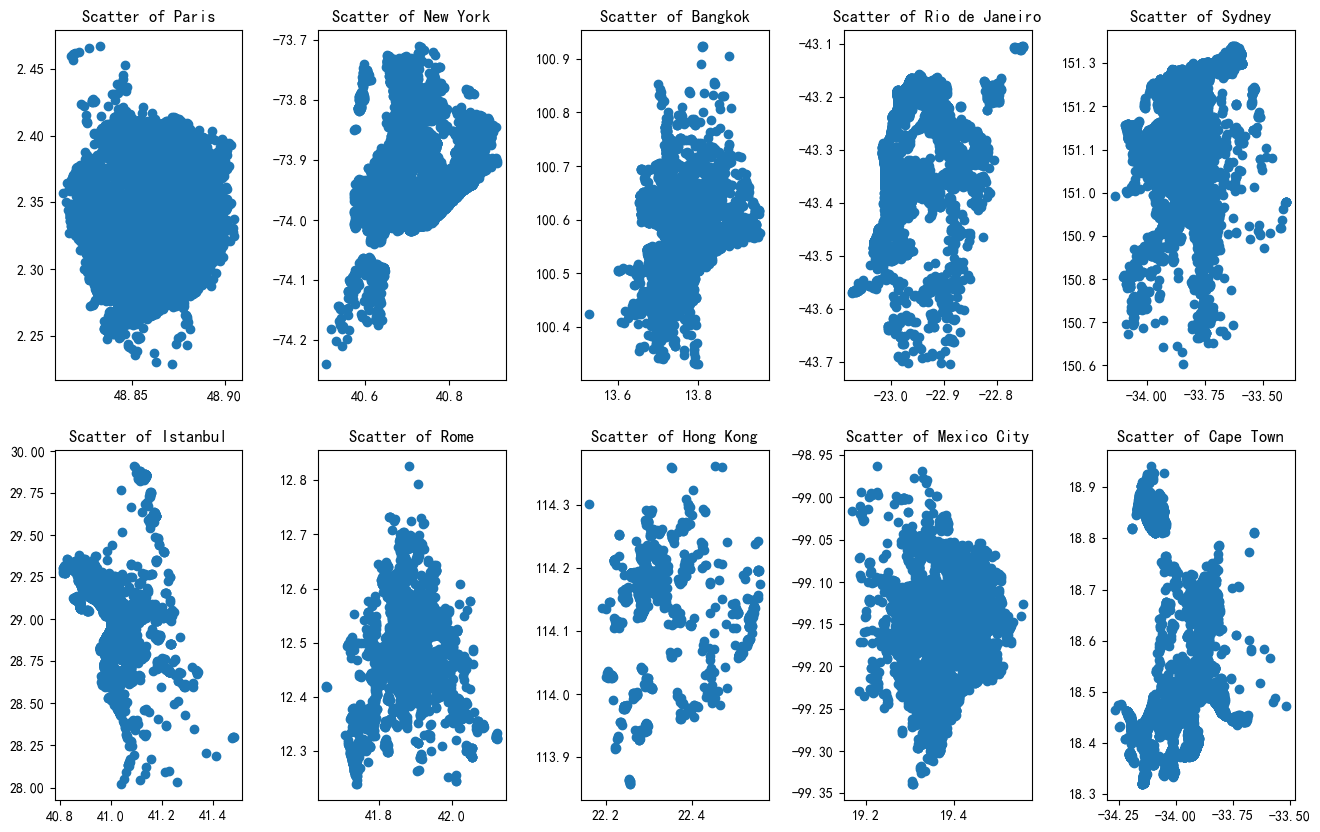

In [88]:
# define the size of figure
plt.figure(figsize=(16, 10))

# draw boxplots of each variables in a loop
for i in range(1,len(city)+1):
    plt.subplot(2,5,i)  # 创建子图
    exec("plt.scatter(city{}['latitude'],city{}['longitude'])".format(i-1,i-1))
    plt.title('Scatter of {}'.format(city[i-1]))
plt.subplots_adjust(wspace=0.4)
plt.show()

From the plot, it seems that the samples are uniformly distributed within each city. Therefore, we believe that the geometric mean of the coordinates of the sample points within each city can serve as the coordinates of the city center. Based on this, we can calculate the distance from the samples to the city center as a new feature.

In [45]:
%%time
#calculate the distance from the data to the city center, and add these distances to a new column 'distance' in the city DataFrame
def distance(row,center):
    return np.sqrt(np.sum((row - center)**2))

for i in range(len(city)):
    exec("city{} = city{}.abs()".format(i,i))
    exec("city{}_center = np.exp(np.mean(np.log(city{})))".format(i,i))
    exec("city{}['distance'] = city{}.apply(distance,center=city{}_center,axis=1)".format(i,i,i))

CPU times: total: 36.4 s
Wall time: 1min 19s


In [46]:
#perform Min-Max normalization on the distance data for each city.
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())
for i in range(len(city)):
    exec("distance{} = pd.DataFrame(minmax(city{}['distance']))".format(i,i))

distance_list = [distance0,distance1,distance2,distance3,distance4,
                 distance5,distance6,distance7,distance8,distance9]

distance = distance0
for i in range(1,len(city)):
    distance = pd.concat([distance,distance_list[i]],axis=0)
#data_processed = data_processed.join(distance,on='listing_id')
#data_processed = data_processed.drop(columns=['latitude','longitude'])

In [47]:
data_processed = data_processed.join(distance,on='listing_id')

In [48]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279547 entries, 281420 to 33603730
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         279547 non-null  object 
 1   host_id                      279547 non-null  int64  
 2   host_since                   279547 non-null  object 
 3   host_duration                279547 non-null  int32  
 4   host_location                279547 non-null  object 
 5   host_response_time           279547 non-null  object 
 6   host_response_rate           279547 non-null  float64
 7   host_acceptance_rate         279547 non-null  float64
 8   host_is_superhost            279547 non-null  bool   
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  bool   
 11  host_identity_verified       279547 non-null  bool   
 12  neighbourhood                279547 non-null  object 
 1

### Five.Standardize the data

In [51]:
X = data_processed.drop(columns=['price(dollar)','amenities'])
a = data_processed['amenities']
Y = data_processed['price(dollar)']

In [56]:
X_raw = data_processed.drop(columns=['price(dollar)','amenities'])
a = data_processed['amenities']
Y = data_processed['price(dollar)']

col_dummy = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable',
             'a few days or more','within a day','within a few hours','within an hour',
             'Paris','New York','Bangkok','Rio de Janeiro','Sydney','Istanbul',
             'Rome','Hong Kong','Mexico City','Cape Town',
             'Entire place','Hotel room','Private room','Shared room']
X_dummy = data_processed[col_dummy]
X_for_standard = X_raw.drop(columns=col_dummy)

Standard = StandardScaler()
X_Standard = Standard.fit_transform(X_for_standard)

X = pd.DataFrame(data=X_Standard,index=X_for_standard.index,columns=X_for_standard.columns)
X = X.join(X_dummy,on='listing_id')

In [52]:
X = X.join(a,on='listing_id')
X.head()

,name,host_id,host_since,host_duration,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,Rome,Sydney,Entire place,Hotel room,Private room,Shared room,instant_bookable_t,instant_bookable_f,distance,amenities
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,3543,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.827539,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long..."
3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,2816,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.801189,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""..."
4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,2572,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.810585,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",..."
4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,2798,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.528713,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter..."
4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,2436,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.676304,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha..."


In [53]:
#Output as csv
X.to_csv('X.csv')
Y.to_csv('Y.csv')